In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as t
plt.style.use("dark_background")
df = pd.read_csv("./time_evolution_10_levels.csv")

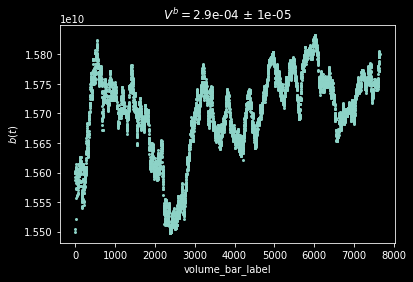

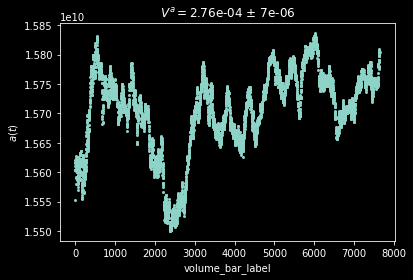

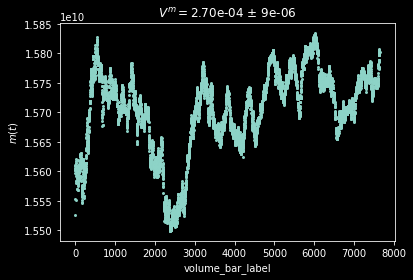

In [60]:
df = df.drop(df[df.bid_price_0 <= 0].index)
df = df.drop(df[df.ask_price_0 <= 0].index)
bid_price_series = df.groupby("volume_bar_label")['bid_price_0'].min()
ask_price_series = df.groupby("volume_bar_label")['ask_price_0'].max()
mid_price_series = df.groupby("volume_bar_label")["mid_price"].mean()
plt.scatter([t for t in range(len(bid_price_series))], bid_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$b(t)$")
bid_volatility = np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1]))
n = len(bid_price_series)
mu = t.moment(bid_volatility, moment=4)
var = bid_volatility.std() ** 2
bid_volatility_error = (((mu - ((n - 3) / (n - 1)) * var ** 2) / n) ** 0.5) / (2 * bid_volatility.std())
plt.title(f"$V^b = ${bid_volatility.std():.1e} $\pm$ {bid_volatility_error:.0e}")
plt.show()
plt.scatter([t for t in range(len(ask_price_series))], ask_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$a(t)$")
ask_volatility = np.log(np.array(ask_price_series[1:])/np.array(ask_price_series[:-1]))
n = len(ask_price_series)
mu = t.moment(ask_volatility, moment=4)
var = ask_volatility.std() ** 2
ask_volatility_error = (((mu - ((n - 3) / (n - 1)) * var ** 2) / n) ** 0.5) / (2 * ask_volatility.std())
plt.title(f"$V^a = ${ask_volatility.std():.2e} $\pm$ {ask_volatility_error:.0e}")
plt.show()
plt.scatter([t for t in range(len(mid_price_series))], mid_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$m(t)$")
mid_volatility = np.log(np.array(mid_price_series[1:])/np.array(mid_price_series[:-1]))
n = len(mid_price_series)
mu = t.moment(mid_volatility, moment=4)
var = mid_volatility.std() ** 2
mid_volatility_error = (((mu - ((n - 3) / (n - 1)) * var ** 2) / n) ** 0.5) / (2 * mid_volatility.std())
plt.title(f"$V^m = ${mid_volatility.std():.2e} $\pm$ {mid_volatility_error:.0e}")
plt.show()

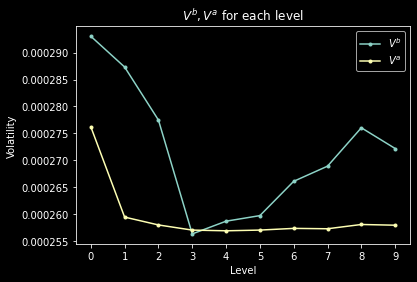

In [61]:
bid_volatility = []
ask_volatility = []
for level in range(10):
    bid_price_series = df.groupby("volume_bar_label")['bid_price_{}'.format(level)].min()
    ask_price_series = df.groupby("volume_bar_label")['ask_price_{}'.format(level)].max()
    bid_volatility.append(np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1])).std())
    ask_volatility.append(np.log(np.array(ask_price_series[1:])/np.array(ask_price_series[:-1])).std())
plt.plot(range(10), bid_volatility, label="$V^b$", marker=".")
plt.plot(range(10), ask_volatility, label="$V^a$", marker=".")
plt.legend()
plt.title("$V^b, V^a$ for each level")
plt.xlabel("Level")
plt.ylabel("Volatility")
plt.xticks(range(10))
plt.show()